In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
path = 'Resources/pet_adoption_data.csv'
df = pd.read_csv(path)

df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [3]:
df['PetType'].value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

In [4]:
df['Breed'].value_counts()

Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64

In [5]:
df['Color'].value_counts()

Color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64

In [6]:
df['Size'].value_counts()

Size
Medium    714
Small     663
Large     630
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [8]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

In [9]:
df['HealthCondition'].value_counts()

HealthCondition
0    1613
1     394
Name: count, dtype: int64

How do special conditions (e.g., disabilities) impact the adoption chances of pets? 

In [16]:
# Calculate adoption rate by Health Condition
adoption_rate_by_healthcondition = df[df['AdoptionLikelihood'] == 1]\
                            .groupby('HealthCondition')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_healthcondition
# Display results
adoption_rate_by_healthcondition

HealthCondition
0    44.252818
1    45.078947
Name: TimeInShelterDays, dtype: float64

<Axes: title={'center': 'Health Conditions affect on Adoptability'}, xlabel='HealthCondition', ylabel='TimeInShelter'>

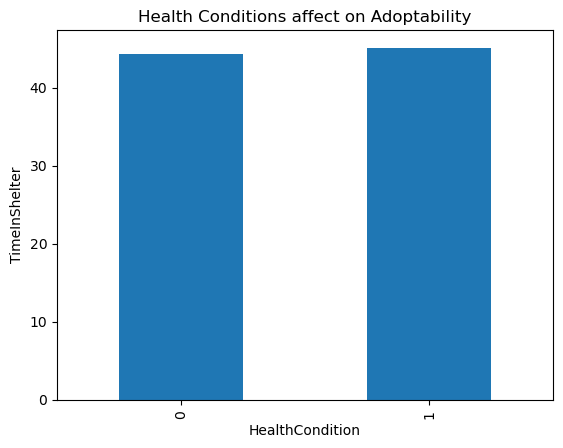

In [17]:
adoption_rate_by_healthcondition.plot.bar(
    x='HealthCondition', 
    y='TimeInShelterDays',
    ylabel='TimeInShelter',
    title='Health Conditions affect on Adoptability')

<Axes: title={'center': 'Health Conditions affect on Adoptability'}, xlabel='HealthCondition', ylabel='TimeInShelter'>

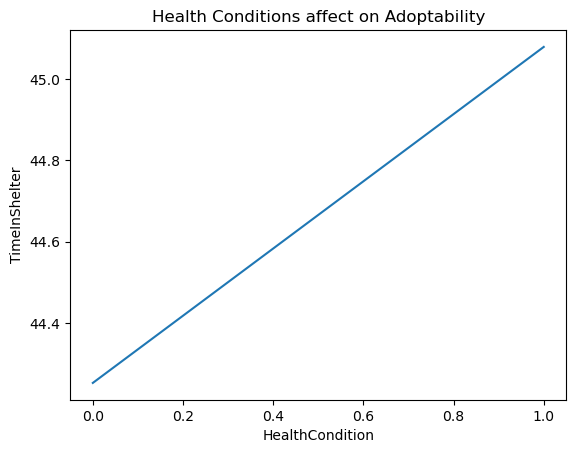

In [18]:
adoption_rate_by_healthcondition.plot.line(
    x='HealthCondition', 
    y='TimeInShelterDays', 
    ylabel='TimeInShelter',
    title='Health Conditions affect on Adoptability')

How does the vaccination status of pets affect their adoption rates?

In [19]:
adoption_rate_by_vaccinated = df[df['AdoptionLikelihood'] == 1]\
                            .groupby('Vaccinated')['TimeInShelterDays']\
                            .mean()
# Sort results
adoption_rate_by_vaccinated
# Display results
adoption_rate_by_vaccinated

Vaccinated
0    44.477612
1    44.280405
Name: TimeInShelterDays, dtype: float64

<Axes: title={'center': 'Vaccination affect on Adoptability'}, xlabel='Vaccinated', ylabel='TimeInShelter'>

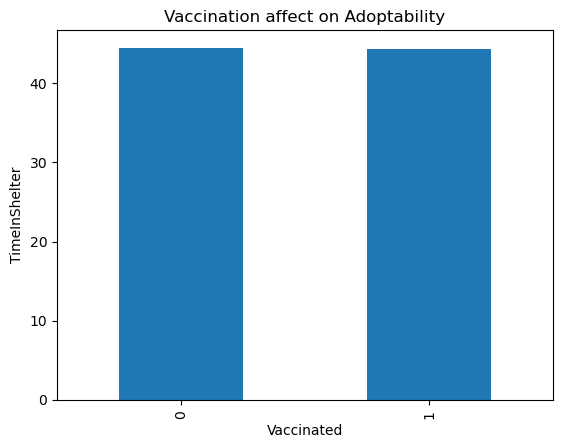

In [20]:
adoption_rate_by_vaccinated.plot.bar(
    x='Vaccinated', 
    y='TimeInShelterDays', 
    ylabel='TimeInShelter',
    title='Vaccination affect on Adoptability'
    )

<Axes: title={'center': 'Vaccination affect on Adoptability'}, xlabel='Vaccinated', ylabel='TimeInShelter'>

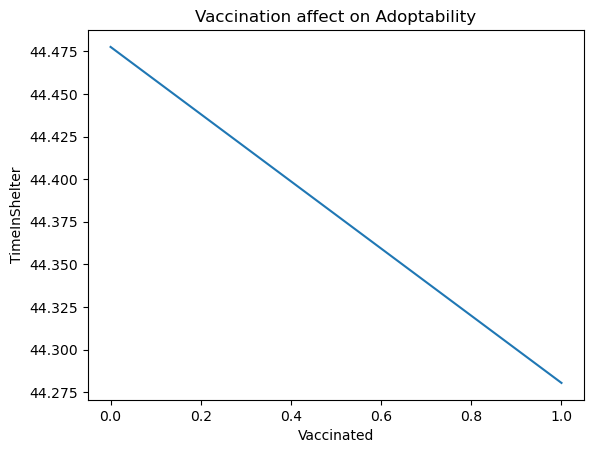

In [21]:
adoption_rate_by_vaccinated.plot.line(
    x='Vaccinated', 
    y='TimeInShelterDays',
    ylabel='TimeInShelter',
    title='Vaccination affect on Adoptability')

In [14]:
X = df.copy().drop(columns=['AdoptionLikelihood','PetID'])
y = df['AdoptionLikelihood']
X

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1
...,...,...,...,...,...,...,...,...,...,...,...
2002,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1
2003,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0
2004,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0
2005,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

X_train

,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner
1312,Bird,Parakeet,138,White,Medium,1.862352,1,0,78,267,0
913,Cat,Persian,172,Gray,Medium,9.262484,1,0,84,346,0
1451,Bird,Parakeet,157,White,Large,15.967909,0,0,20,393,1
259,Cat,Siamese,69,Gray,Medium,11.486612,1,1,3,201,0
1556,Bird,Parakeet,100,Brown,Large,22.702464,1,0,24,496,0
...,...,...,...,...,...,...,...,...,...,...,...
571,Dog,Golden Retriever,84,Brown,Large,10.457076,1,0,25,435,0
1197,Rabbit,Rabbit,69,White,Medium,9.343835,0,0,51,443,1
753,Dog,Golden Retriever,69,Brown,Small,1.364757,1,1,4,41,0
1443,Bird,Parakeet,50,Orange,Small,17.967257,0,0,86,144,0


Scale the Features